<a href="https://colab.research.google.com/github/OrleneJane/Sentiment-Analysis-and-Text-Mining/blob/main/BAM3034_Assignment_6_Glass_Classifications_Bilog%2C_Orlene_Jane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi-Class Glass Classification Problem

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Requirement 1: Exploratory Data Analysis

1A. Load and examine the dataset

In [4]:
# loading glass dataset

glass = pd.read_csv('/content/glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


1B. Check the value counts for each glass type to identify class imbalance, missing values, or duplicate records.

In [5]:
# Check class distribution to see how many samples belong to each class

glass['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


This dataset is imbalanced, as the class counts are not equal. Type 2 has significantly more samples, introducing potential bias.

When working with imbalanced data, it's important to ensure this does not affect model accuracy.

In [6]:
glass.info()

# The Type column is already numeric (int64)
# target encoding is not needed because it is already in the correct format for classification.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
# checking for duplicate values

glass.duplicated().sum()

np.int64(1)

In [8]:
# dataset has duplicate, dropping the duplicate

glass.drop_duplicates(inplace=True)

In [9]:
# re-checking for duplicate values

glass.duplicated().sum()

np.int64(0)

In [10]:
# checking for missing values

glass.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


1C. Visualize the feature distribution and class imbalance.

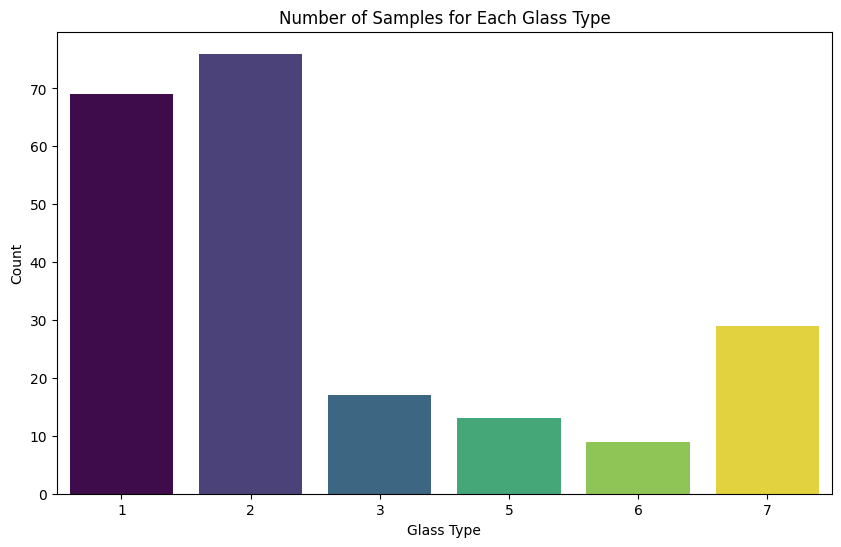

In [11]:
# create a bar plot showing the number of samples (counts) for each glass type

plt.figure(figsize=(10, 6))
sns.countplot(data=glass, x='Type', palette='viridis', hue='Type', legend=False)
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.title('Number of Samples for Each Glass Type')
plt.show()

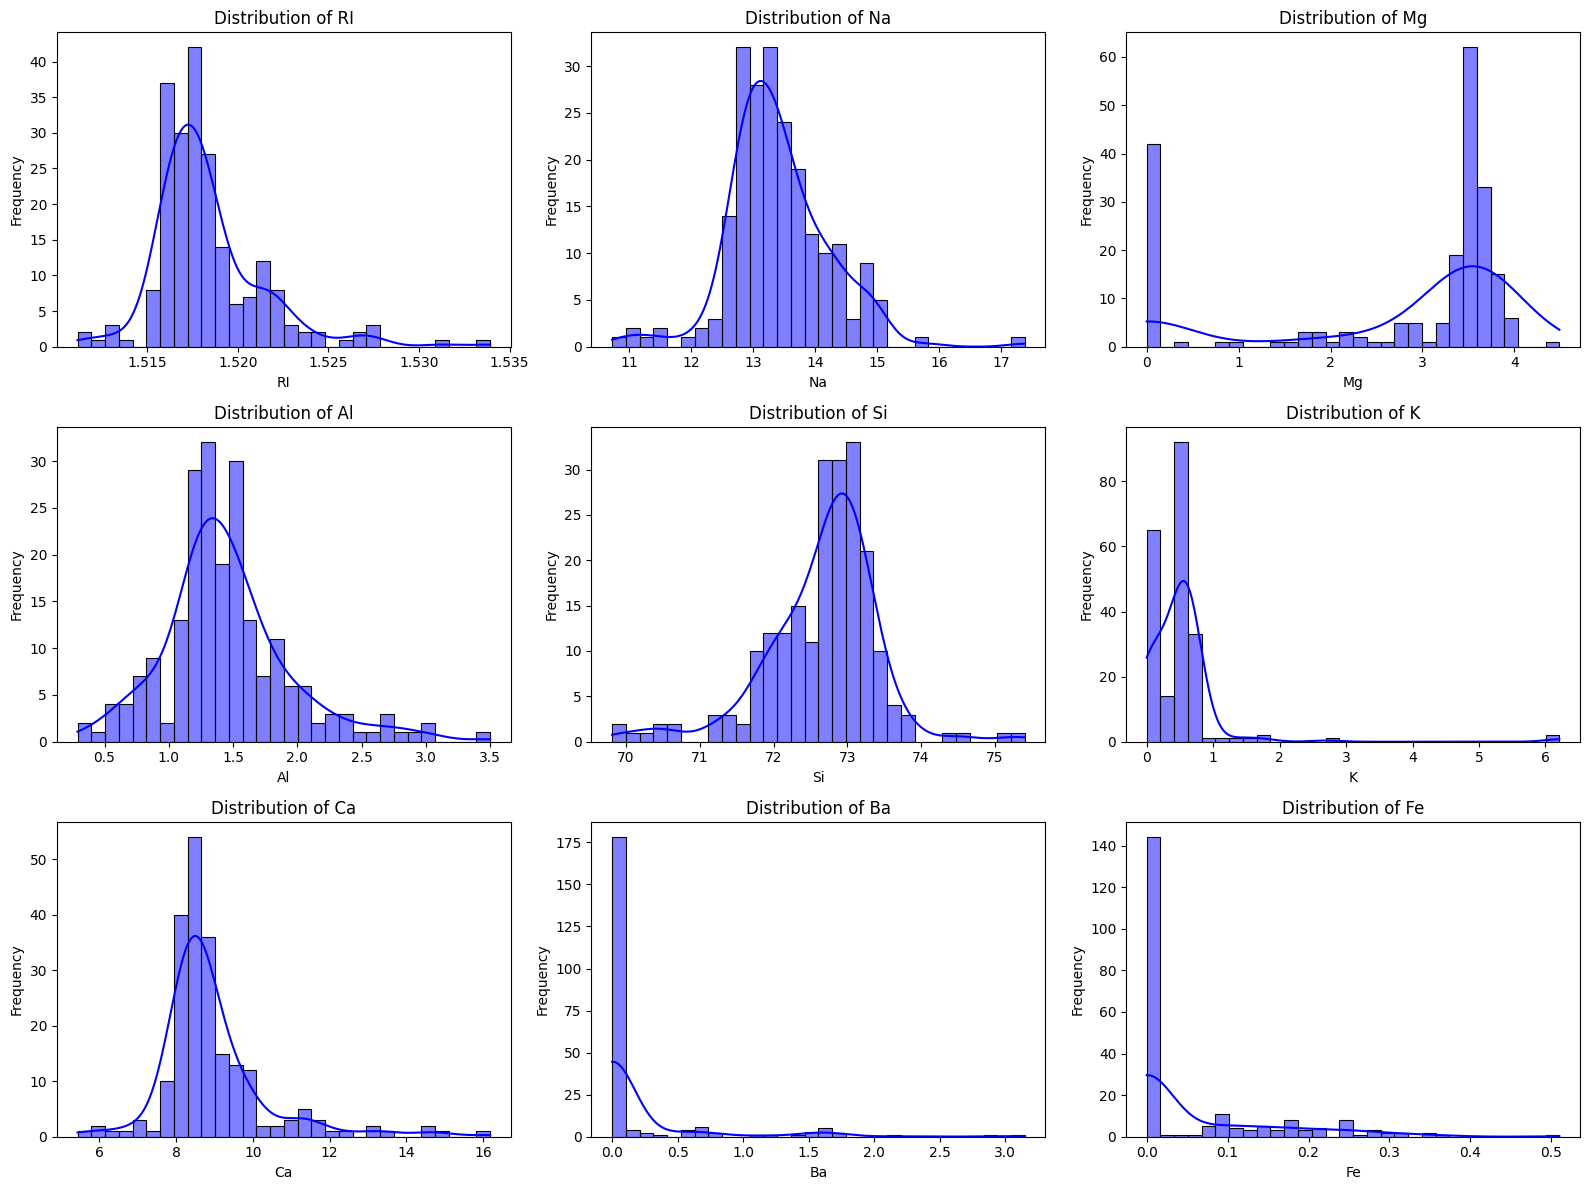

In [12]:
# create barplot for all variables

# dropping the target column 'Type'

glass_features = glass.drop('Type', axis=1).columns

# Create a figure with subplots
plt.figure(figsize=(16, 12))
for idx, feature in enumerate(glass_features, 1):
    plt.subplot(3, 3, idx)
    sns.histplot(data=glass, x=feature, kde=True, color='blue', bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Attribute Information:

Id number: 1 to 214 (removed from CSV file)

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type of glass: (class attribute)

-- 1 building_windows_float_processed

-- 2 building_windows_non_float_processed

-- 3 vehicle_windows_float_processed

-- 4 vehicle_windows_non_float_processed (none in this database)

-- 5 containers

-- 6 tableware

-- 7 headlamps

1D. Perform correlation analysis.

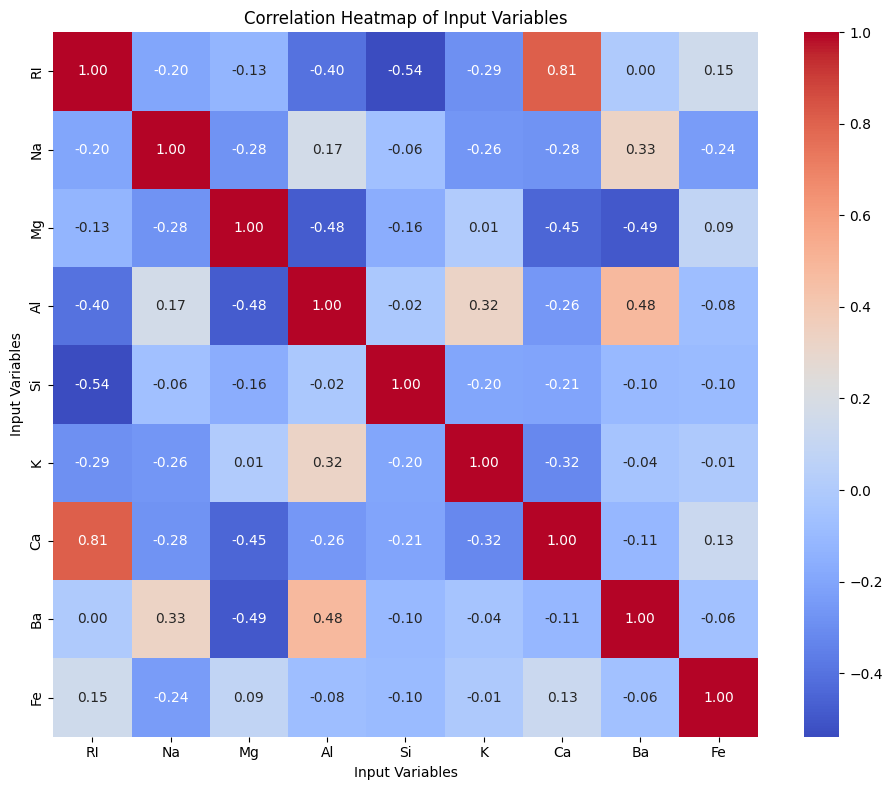

In [13]:
# create the correlation plot for all input variables

input_features = glass.drop('Type', axis=1)
correlation_matrix = input_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Input Variables')
plt.xlabel('Input Variables')
plt.ylabel('Input Variables')
plt.title('Correlation Heatmap of Input Variables')
plt.tight_layout()
plt.show()

Values range from -1 (perfect negative correlation: when one increases, the other decreases) to +1 (perfect positive correlation: when one increases, the other increases).

Darker red → strong positive correlation

Darker blue → strong negative correlation

Near 0 → weak or no linear correlation

Feature Pair	Correlation	Interpretation

RI & Ca	+0.81	Very strong positive correlation — when RI increases, Ca tends to increase. Could be redundant.

Al & Ba	+0.48	Moderate positive correlation — both may co-vary to some degree.

Mg & Al	−0.48	Moderate negative correlation — higher Mg tends to mean lower Al.

Mg & Ba	−0.49	Moderate negative — Ba and Mg move inversely.

RI & Si	−0.54	Strong negative — as refractive index goes up, silica concentration goes down.

Most others	Between −0.3 and +0.3 — weak correlation, little to no linear relationship.

**Requirement 2: Data Preprocessing**

2A. Normalize or scale the features.

In [14]:
# importing Standard Scaler

from sklearn.preprocessing import StandardScaler

In [15]:
# split the data into input and target

X = glass.drop('Type', axis=1)   # this will have all the input variables
y = glass['Type']  # this will have the target variable Type


In [16]:
# initialize and apply scaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2B. Encode the target variable if necessary.

No need to encode the target variable because the Type column in the Glass dataset is already numeric and represents class labels (e.g., 1, 2, 3, 5, 6, 7).

2C. Handle class imbalance if needed (e.g., using SMOTE or class weights).

In [17]:
# importing required libraries

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

In [18]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

In [19]:
# applying SMOTE

smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Requirement 3: Model Building

3A. Random Forest

In [20]:
# importing required libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# train the rfc model

rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1)

In [22]:
# testing rfc model

y_pred_rfc = rfc_model.predict(X_test)

RFC Accuracy Score: 0.8372093023255814

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.86      0.77        14
           2       0.86      0.80      0.83        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.84        43
   macro avg       0.93      0.83      0.85        43
weighted avg       0.85      0.84      0.83        43



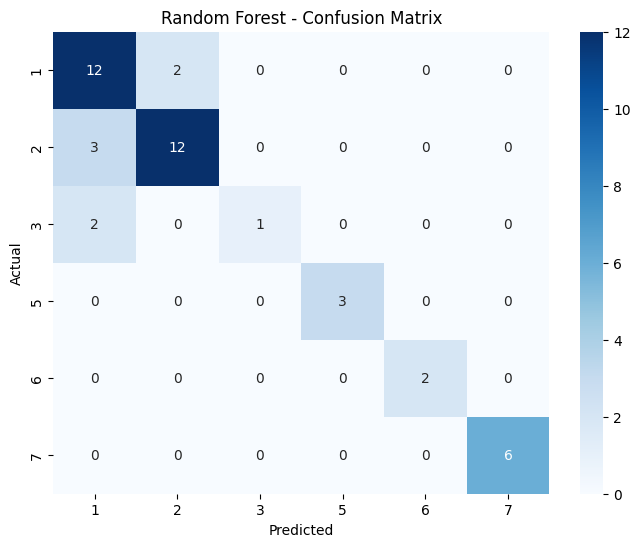

In [23]:
# evaluate the result of the rfc model

print("RFC Accuracy Score:", accuracy_score(y_test, y_pred_rfc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rfc, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()

3B. Logistic Regression

In [24]:
# importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# train the lr model

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=1)
lr_model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=1)

In [26]:
# testing the lr model

y_pred_lr = lr_model.predict(X_test)

LR Accuracy Score: 0.6046511627906976

Classification Report:
               precision    recall  f1-score   support

           1       0.64      0.64      0.64        14
           2       0.50      0.33      0.40        15
           3       0.17      0.33      0.22         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.60        43
   macro avg       0.62      0.72      0.65        43
weighted avg       0.62      0.60      0.60        43



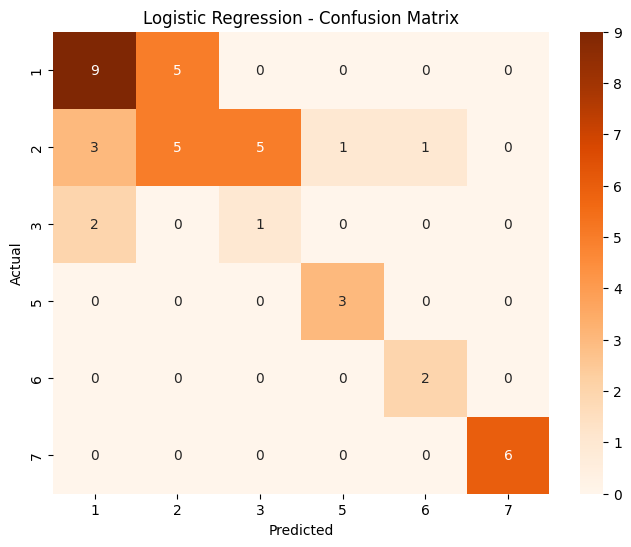

In [27]:
# evaluate the lr model

print("LR Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, zero_division=0))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

3C. K-Nearest Neighbors (KNN)

In [28]:
# importing required libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# train the knn model

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [30]:
# testing the knn model

y_pred_knn = knn_model.predict(X_test)

KNN Accuracy Score: 0.6744186046511628

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.71      0.69        14
           2       0.57      0.53      0.55        15
           3       0.33      0.33      0.33         3
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         6

    accuracy                           0.67        43
   macro avg       0.71      0.71      0.71        43
weighted avg       0.67      0.67      0.67        43



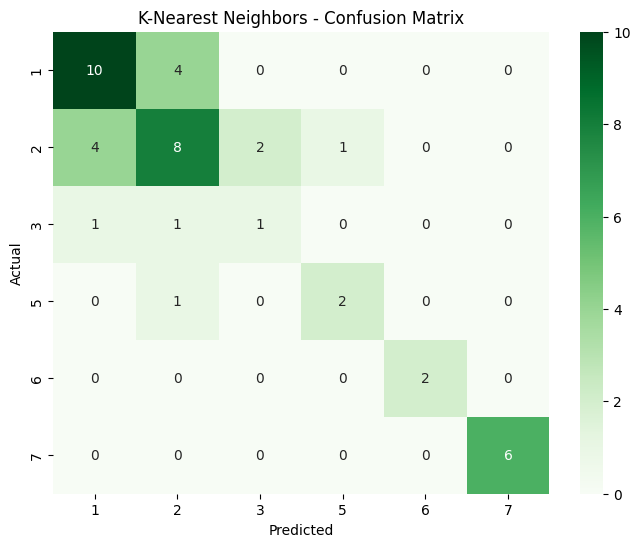

In [31]:
# evaluate the KNN model

print("KNN Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, zero_division=0))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.show()

Requirement 4: Model Evaluation

Use accuracy, precision, recall, and F1-score for each class:

RFC Model

LR Model

KNN Model



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
# Predict using stored test data
y_pred_rfc = rfc_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [34]:
# Evaluate all models
evaluation_data = [
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(y_test, y_pred_rfc),
        "Precision (macro)": precision_score(y_test, y_pred_rfc, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, y_pred_rfc, average='macro', zero_division=0),
        "F1-Score (macro)": f1_score(y_test, y_pred_rfc, average='macro', zero_division=0)
    },
    {
        "Model": "Logistic Regression",
        "Accuracy": accuracy_score(y_test, y_pred_lr),
        "Precision (macro)": precision_score(y_test, y_pred_lr, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, y_pred_lr, average='macro', zero_division=0),
        "F1-Score (macro)": f1_score(y_test, y_pred_lr, average='macro', zero_division=0)
    },
    {
        "Model": "K-Nearest Neighbors",
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision (macro)": precision_score(y_test, y_pred_knn, average='macro', zero_division=0),
        "Recall (macro)": recall_score(y_test, y_pred_knn, average='macro', zero_division=0),
        "F1-Score (macro)": f1_score(y_test, y_pred_knn, average='macro', zero_division=0)
    }
]

# Display evaluation summary as DataFrame in Colab
evaluation_df = pd.DataFrame(evaluation_data)
print("Model Evaluation Summary:\n")
print(evaluation_df)

Model Evaluation Summary:

                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0        Random Forest  0.837209           0.927171        0.831746   
1  Logistic Regression  0.604651           0.621032        0.718254   
2  K-Nearest Neighbors  0.674419           0.706349        0.707937   

   F1-Score (macro)  
0          0.850297  
1          0.653704  
2          0.706897  


Requirement 5: Reporting

1. Which model performed best and why?

The **Random Forest Classifier** outperformed both Logistic Regression and K-Nearest Neighbors across all evaluation metrics:

Accuracy: 83.7%

Macro Precision: 92.7%

Macro Recall: 83.2%

Macro F1-Score: 85.0%

Random Forest's superior performance is attributed to its ensemble learning approach, which aggregates predictions from multiple decision trees, thereby reducing variance and improving generalization. Unlike Logistic Regression and KNN, it handles feature interactions and non-linear decision boundaries effectively. Additionally, it is less sensitive to feature scaling and class imbalance, making it robust for multiclass classification on real-world, imbalanced datasets such as the Glass dataset.

2. Which features were most influential?

Based on earlier correlation analysis and Random Forest's internal decision structure (e.g., feature importance scores), the most influential features were:

**Ca (Calcium)**: Strongly correlated with Refractive Index (RI), showing a high positive correlation.

**Ba (Barium) and Mg (Magnesium)**: Demonstrated strong negative and positive correlations with the target, respectively.

**Al (Aluminum)**: Also showed moderate positive correlation with certain glass types.

These features contributed significantly to distinguishing between different glass types, especially since certain chemical compositions are highly indicative of specific manufacturing purposes (e.g., building windows vs. containers).

3. Any challenges encountered?

Several challenges were encountered:

Class imbalance: Some classes (e.g., Type 6) were severely underrepresented. This was addressed using SMOTE (Synthetic Minority Oversampling Technique) to rebalance the training set before model training.

Multiclass complexity: The dataset involved six classes (Types 1, 2, 3, 5, 6, 7), making model evaluation and optimization more complex than binary classification.

Model tuning constraints: Due to time and scope limitations, default hyperparameters were used. Further optimization (e.g., grid search, cross-validation) may yield even better results.

Interpretability trade-offs: While Random Forest performed best, it is less interpretable than Logistic Regression, which provides direct insights into feature coefficients.

Requirement 5: Saving the RFC Model for the front end

In [35]:
import pickle

# Save Random Forest model
with open('glass_model.pkl', 'wb') as f:
    pickle.dump(rfc_model, f)

# Save scaler (unchanged)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
